[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cohmathonc/BIOSCI544/blob/master/BIOSCI544_moranProcess.ipynb)

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
from ipywidgets import interact, interactive, fixed, interact_manual,widgets



[147205 155588 121071 114934 113417 124440 145363 120746 69069]
m-1=  168959
[]


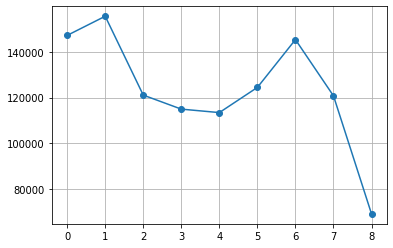

In [ ]:
def Linear_congruential_generators(m,a,c,seed,n=1,return_int=False):
  if n==1:
    return (a*seed+c)%m 
  X=np.full(n,None)
  
  for i in range(n):
    seed=(a*seed+c)%m
    X[i]=seed

  if not return_int:
    X/=(m-1)
  return X[1:]

seed=1739
#m=11*3*5*2
#a=11*3*5*2+1
#c=13
m=11*3*5*2*2**9
a=11*3*5*2*2+1
c=13*17*23
X=Linear_congruential_generators(m,a,c,seed,n=10,return_int=True)
print(X)
plt.plot(X,'-o')
plt.grid()
print('m-1= ',m-1)
print(np.where(X==199)[0])





In [ ]:
def simulateOneDice(m,a,c,seed,n=1):
  v=Linear_congruential_generators(m,a,c,seed,n=n)
  bins=np.array([1/6,2/6,3/6,4/6,5/6])
  diceValues=bins.searchsorted(v)+1
  return diceValues

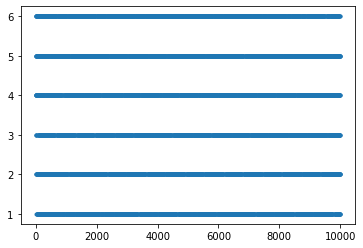

In [ ]:
seed=1120
diceOut=simulateOneDice(m,a,c,seed,n=10000)
plt.plot(diceOut,'.')

Text(0, 0.5, 'conts')

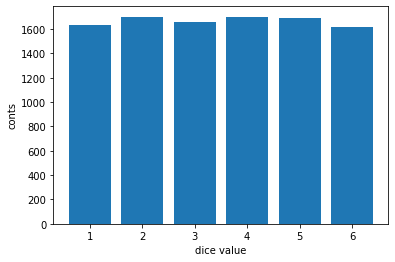

In [ ]:
cc=np.bincount(diceOut)[1:]
plt.bar(np.arange(cc.size)+1,cc)
plt.xlabel("dice value")
plt.ylabel("conts")

[ 1  0  1  2  1  0 -1  0 -1  0 -1  0  1  0  1  2  1  2  1  0  1  0 -1 -2
 -3 -4 -5 -6 -5 -6 -5 -4 -5 -6 -5 -6 -5 -4 -3 -2 -3 -4 -5 -6 -5 -4 -5 -4
 -3 -2 -3 -4 -5 -4 -3 -4 -3 -4 -5 -4 -3 -4 -5 -4 -5 -4 -3 -2 -1  0 -1  0
  1  0 -1  0 -1 -2 -1  0  1  0 -1  0 -1 -2 -3 -2 -1 -2 -3 -4 -5 -4 -3 -2
 -1  0  1]


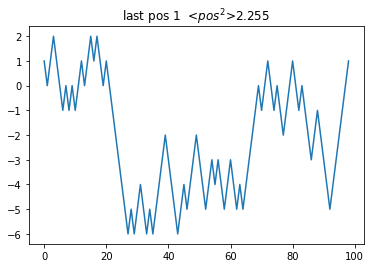

In [ ]:
def randomWalk(nstep,m,a,c,seed):
  pos=np.cumsum(2*(Linear_congruential_generators(m,a,c,seed,n=nstep)>0.5).astype(int)-1)
  return pos
pos=randomWalk(100,m,a,c,1150)
print(pos)
plt.title(r'last pos ' + str(np.round(pos[-1],3))+r'  <$pos^2$>'+str(np.round(np.std(pos),3)))

plt.plot(pos)
  


In [ ]:
rep=1000
nstep=1000
M=np.full(rep,None,dtype=float)
std=np.full(rep,None,dtype=float)
seed=162303

for i in range(rep):
  pos=randomWalk(nstep,m,a,c,seed)
  M[i]=pos[-1]
  std[i]=np.std(pos)
  seed=np.sum(pos**2)
print(np.mean(M))
print(np.std(M),np.sqrt(nstep))


1.634
16.0120593303922 31.622776601683793


[   1    2    3 ... -102 -101 -102]


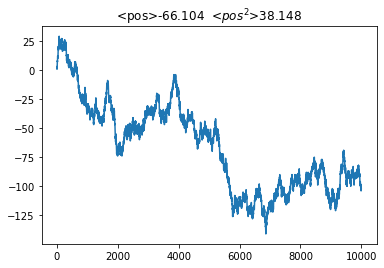

In [ ]:
def randomWalk_np(nstep,seed):
  np.random.seed(seed)
  pos=np.cumsum(2*(np.random.rand(nstep)>0.5).astype(int)-1)
  return pos
pos=randomWalk_np(10000,1145)
print(pos)
plt.title(r'<pos>' + str(np.round(np.mean(pos),3))+r'  <$pos^2$>'+str(np.round(np.std(pos),3)))

plt.plot(pos)
  

In [ ]:
rep=10000
nstep=1000
M=np.full(rep,None,dtype=float)
std=np.full(rep,None)
seed=1233

for i in range(rep):
  pos=randomWalk_np(nstep,None)
  M[i]=pos[-1]
  std[i]=np.std(pos)
print(np.mean(M))
print(np.std(M),np.sqrt(nstep))


-0.034
31.74557046266455 31.622776601683793
